In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('C:/Users/Sahithi/Downloads/Churn_Modelling (1).csv')

In [3]:
data.shape

(10000, 14)

In [4]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


# Get information about our dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


# Dropping irrelevant features

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data=data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
data=pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


# Not handling imbalanced

In [14]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

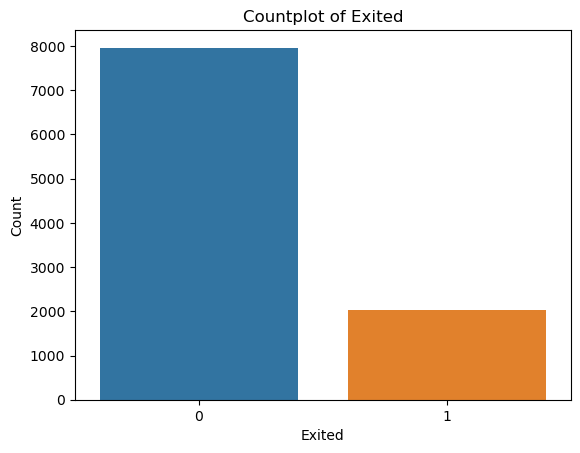

In [16]:
# Assuming 'data' is your DataFrame containing the 'Exited' column

# Create a count plot for 'Exited'
sns.countplot(x='Exited', data=data)

# Add title and labels
plt.title('Countplot of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')

# Display the plot
plt.show()

In [17]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [18]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Handling imbalanced dataset with SMOTE

In [19]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [22]:
X_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    True               False            True           1
689          49   1       96039.869710   1              1          0               39777.816725     True               False            True           1
             40   8       160272.270000  1              1          0               49656.240000     False              False            True           1
             42   9       118586.350710  1              0          0               161260.229227    True               False            True           1
             43   2       118563.682710  1              1          0               10325.133432     True               False            True           1
                                                                                       

In [23]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# Splitting the dataset into training and testing dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()

In [28]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [29]:
X_train

array([[-0.01269063, -0.39789958,  0.4438268 , ...,  1.32506086,
         1.57598535, -1.23380421],
       [ 1.09284097,  0.10340982, -1.39630385, ..., -0.75468232,
        -0.63452366,  0.81050137],
       [ 0.27995009,  0.70498109, -1.76432998, ..., -0.75468232,
         1.57598535, -1.23380421],
       ...,
       [ 0.20408027,  0.2036717 ,  1.17987907, ..., -0.75468232,
        -0.63452366,  0.81050137],
       [ 0.06317919,  0.2036717 ,  0.4438268 , ...,  1.32506086,
        -0.63452366,  0.81050137],
       [ 0.52923663,  1.00576673, -1.39630385, ...,  1.32506086,
        -0.63452366,  0.81050137]])

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log=LogisticRegression()

In [32]:
log.fit(X_train,y_train)

LogisticRegression()

In [33]:
y_pred1 =log.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred1)

0.7790332705586943

In [36]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [37]:
precision_score(y_test,y_pred1)

0.7688410386320456

In [38]:
recall_score(y_test,y_pred1)

0.7817128139085641

In [39]:
f1_score(y_test,y_pred1)

0.7752234993614304

# SVC

In [40]:
from sklearn import svm

In [41]:
svm=svm.SVC()

In [42]:
svm.fit(X_train,y_train)

SVC()

In [43]:
y_pred2=svm.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred2)

0.8367859384808537

In [45]:
precision_score(y_test,y_pred2)

0.8395792241946088

In [46]:
recall_score(y_test,y_pred2)

0.8222794591113973

In [47]:
f1_score(y_test,y_pred2)

0.8308392973324659

# KNeighborsClassifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier()

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
y_pred3=knn.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred3)

0.8163841807909604

In [53]:
precision_score(y_test,y_pred3)

0.8067173637515843

# DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt=DecisionTreeClassifier()

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred4=dt.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred4)

0.8019460138104206

In [59]:
precision_score(y_test,y_pred4)

0.7892095357590966

# RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf=RandomForestClassifier()

In [62]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred5=rf.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred5)

0.8700564971751412

In [65]:
precision_score(y_test,y_pred5)

0.8662379421221865

# 17.GradientBoostingClassifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc=GradientBoostingClassifier()

In [68]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [69]:
y_pred6=gbc.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred6)

0.8392969240426867

In [71]:
precision_score(y_test,y_pred6)

0.8413114754098361

In [72]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'ACC':[
                             accuracy_score(y_test,y_pred1),
                            accuracy_score(y_test,y_pred2),
                            accuracy_score(y_test,y_pred3),
                            accuracy_score(y_test,y_pred4),
                            accuracy_score(y_test,y_pred5),
                            accuracy_score(y_test,y_pred6)
                         ]
                        })

In [73]:
final_data

,Models,ACC
0,LR,0.779033
1,SVC,0.836786
2,KNN,0.816384
3,DT,0.801946
4,RF,0.870056
5,GBC,0.839297


In [74]:
import seaborn as sns

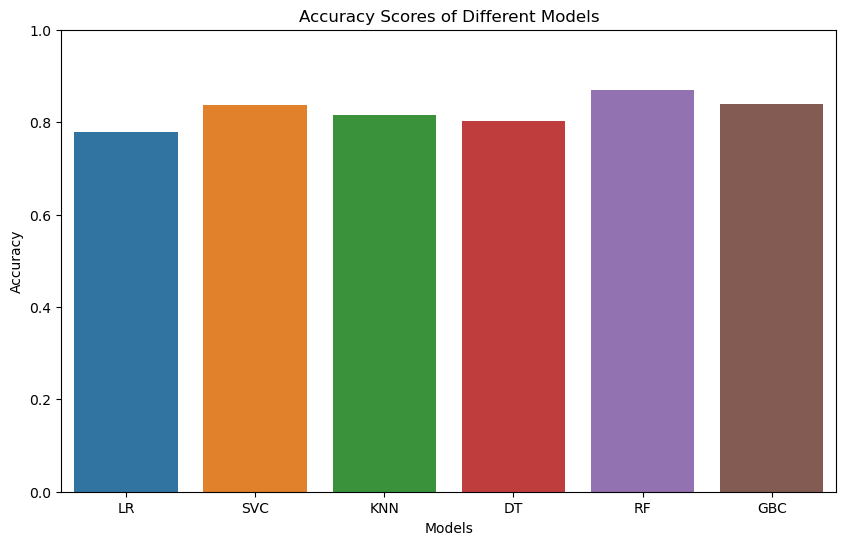

In [75]:
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='ACC', data=final_data)
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.0, 1.0)  # Adjust ylim if necessary
plt.ylabel('Accuracy')
plt.show()

In [76]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                         'PRE':[
                            precision_score(y_test,y_pred1),
                            precision_score(y_test,y_pred2),
                            precision_score(y_test,y_pred3),
                            precision_score(y_test,y_pred4),
                            precision_score(y_test,y_pred5),
                            precision_score(y_test,y_pred6)
                         ]
                        })

In [77]:
final_data

,Models,PRE
0,LR,0.768841
1,SVC,0.839579
2,KNN,0.806717
3,DT,0.789210
4,RF,0.866238
5,GBC,0.841311


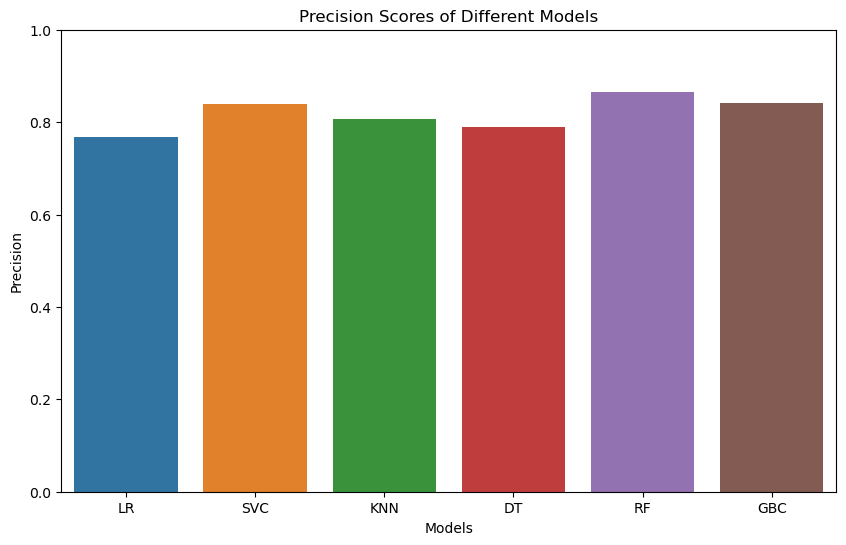

In [78]:
# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='PRE', data=final_data)
plt.title('Precision Scores of Different Models')
plt.ylim(0.0, 1.0)  # Adjust ylim if necessary
plt.ylabel('Precision')
plt.show()

In [79]:
X_res=sc.fit_transform(X_res)

In [80]:
rf.fit(X_res,y_res)

RandomForestClassifier()

# Save the model

In [81]:
import joblib

In [82]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [83]:
model=joblib.load('churn_predict_model')

In [84]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [85]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)